* Before tackling Back propagation in Neural Network an understanding of Gradient Descent is crucial. Therefore, I will work out the best fit line using Gradient Descent, an iterative optimization algorithm, to get to a slope and intercept of a line with a goal of minimizing the cost function (error). 
* But before that I will calculate the parameters using linear algebra from scratch and the Sklearn library.


In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid')

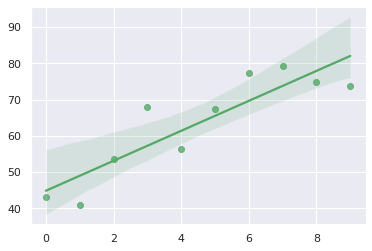

In [2]:
#First lets see the linear regression line using regplot from seaborn
X = np.arange(10)
y = [43.13, 40.98, 53.52, 67.88, 56.31, 67.5 , 77.25, 79.21, 74.97, 73.84]
sns.regplot(x=X, y = y, color='g')
plt.show()

#### First Method: lets calculate the slope m and intercept b of the best Line Fit using Least Square Method as shown in Khan's Academy.
* m = sum((xi - Avg(x))(yi - Avg(y))) / sum((xi - avg(xi))**2)
* b = avg(yi) -  m*avg(xi)

In [3]:
avgX = np.average(X)
avgy = np.average(y)

m = np.sum(np.multiply(X -avgX, y - avgy)) / np.sum((X-avgX)**2)

b = avgy - m * avgX

print(f"The rate of change and the Intercept using the Least sqaure method for\n X = {X} \nand\n y= {y} are: \n\t m = {round(m,2)} and b = {np.round(b,2)} respectively")


The rate of change and the Intercept using the Least sqaure method for
 X = [0 1 2 3 4 5 6 7 8 9] 
and
 y= [43.13, 40.98, 53.52, 67.88, 56.31, 67.5, 77.25, 79.21, 74.97, 73.84] are: 
	 m = 4.13 and b = 44.86 respectively


### Second method: Using the sklearn library

In [6]:
from sklearn.linear_model import LinearRegression

# instantiate and fit the model
lin = LinearRegression()
lin.fit(X.reshape(-1,1), y) # the 1D array of the input value X has to be converted to a 2D array

m = lin.coef_
b = lin.intercept_

print(f"The slope and the Intercept using Linear Regression from the sklearn library for \nX = {X} \nand \ny= {y} are: \n\t m = {round(m[0],2)} and b = {np.round(b,2)} respectively")
print(f"\nThe acuracy of the best fit line is: \n\t Score = {round(lin.score(X.reshape(-1,1), y)*100, 2)}% ")

The slope and the Intercept using Linear Regression from the sklearn library for 
X = [0 1 2 3 4 5 6 7 8 9] 
and 
y= [43.13, 40.98, 53.52, 67.88, 56.31, 67.5, 77.25, 79.21, 74.97, 73.84] are: 
	 m = 4.13 and b = 44.86 respectively

The acuracy of the best fit line is: 
	 Score = 79.07% 


### Third Method: Gradient Descent: an iterative optimization algorithm for miniizing the cost function, i.e. in this case the Mean Sqaure Error(MSE):

* We use partial derivative to figure out which direction to descend to and find the minima,
 * Partial derivative of the MSE with respect to m is:
> dmse/dm = sum ((yi) - (mxi + b))**2 / 2*n = 2(Sum((yi) - (mxi + b))*-xi)/2n = sum(-xi*((yi) - (mxi + b)))/n
 * Partial Derivative of the MSE with respect to b is:

 > dmse/db = sum ((yi) - (mxi + b))**2 / 2*n = 2(Sum((yi) - (mxi + b))*-1)/2n = sum(-((yi) - (mxi + b)))/n
 * Where: 
> MSE = sum ((yi) - (y_predi))***2 / 2 times the number of samples 
 
* To reach the minima we apply a learning rate and then calculate the difference between old and new values iteratively until we reach it,


In [7]:
# First without a function
m, b = 0, 0 # we assign a random initial values for m and b
lr = 0.01 # best optimal learning rate of 0.01

In [8]:
mDerivative = np.sum(np.multiply( -X , 
                   np.subtract(
                                y, 
                                (m * X + b)
                               )
                   )
      )/ len(X)

bDerivative = np.sum(-1 * np.subtract(
                                      y, 
                                      (m * X + b)
                                      )
      )/len(X)

#new m and b
m = m - lr * mDerivative
b = b - lr * bDerivative
print(f"Inital value of m is: {round(m,2)}, and be is: {round(b,2)}")

Inital value of m is: 3.2, and be is: 0.63


In [9]:
 #use a function and put everything above in the function
def gradientDescent(x, y, m, b, lr):
    """ """
    mDerivative = np.sum(np.multiply( -x , 
                   np.subtract(
                                y, 
                                (m * x + b)
                               )
                   )
      )/ len(x)

    bDerivative = np.sum(-1 * np.subtract(
                                      y, 
                                      (m * x + b)
                                      )
      )/len(x)

    m -= lr * mDerivative
    b -= lr * bDerivative
    return m, b

In [11]:
m, b = 0, 0
lr = 0.01 # learning rate
mlist = []
blist = []
mselist = []
epochs = 5000
n = len(X)
for i in range(epochs):
  m, b = gradientDescent(X, y, m, b, lr)
  yhut = m*X + b
  mse =  np.sum(np.subtract(y, yhut)**2)/len(X)
  blist.append(b)
  mlist.append(m)
  mselist.append(mse)

blist.sort()
mlist.sort()
print(f"The slope and the Intercept where the MSE is at a minima using Grasdient Descent is: m = {round(m,2)}, b = {round(b,2)}")

The slope and the Intercept where the MSE is at a minima using Grasdient Descent is: m = 4.13, b = 44.86


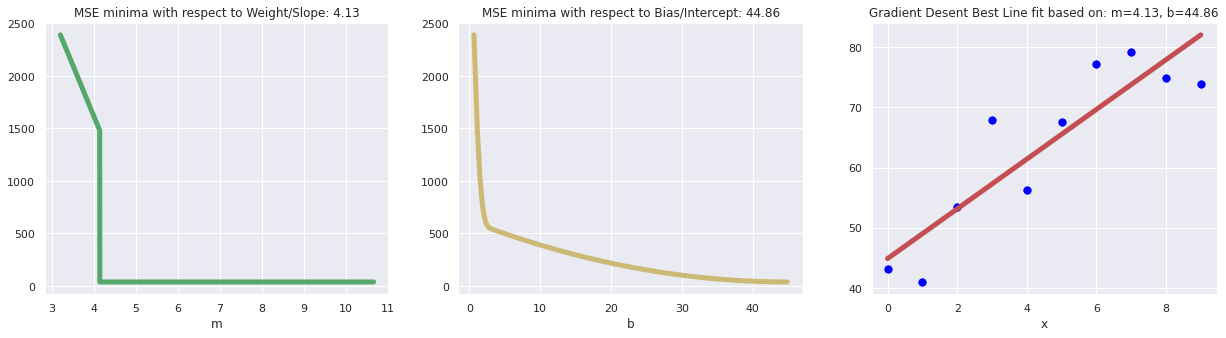

In [27]:
fig, axes = plt.subplots(1, 3, sharex=False, figsize=(21,5))

axes[0].set_title(f"MSE minima with respect to Weight/Slope: {round(m,2)}")
axes[1].set_title(f"MSE minima with respect to Bias/Intercept: {round(b,2)}")
axes[2].set_title(f"Gradient Desent Best Line fit based on: m={round(m,2)}, b={round(b,2)}")
sns.lineplot(ax = axes[0], x = mlist, y = mselist, color='g', linewidth=5)

sns.lineplot(ax = axes[1], x = blist, y = mselist, color='y', linewidth=5)
sns.lineplot(ax = axes[2], x = X, y = X*m + b, color='r', linewidth=5)
sns.scatterplot(ax = axes[2], x = X, y = y, color='blue', s=85)

axes[0].set_xlabel("m")
axes[1].set_xlabel("b")
axes[2].set_xlabel("x")
plt.show()